In [1]:
from graph.graph1 import EquipmentGraph
from models.model import InputDataValidator
from models.state import EquipmentState
from langchain_openai import ChatOpenAI, AzureChatOpenAI, AzureOpenAI
from langchain_google_genai import ChatGoogleGenerativeAI
import os
from rich import print as pp

llm = AzureChatOpenAI(
    azure_deployment=os.environ.get("AZURE_OPENAI_DEPLOYMENT"),
    openai_api_version=os.environ.get("AZURE_OPENAI_VERSION"),         
    azure_endpoint=os.environ.get("AZURE_OPENAI_ENDPOINT"),  
    api_key=os.environ.get("AZURE_OPENAI_KEY"),                 
    model="gpt-4o",
    temperature=0.0          
)

# llm = ChatGoogleGenerativeAI(
#     model="gemini-2.5 flash",  # Use Gemini 1.5 Pro for advanced capabilities
#     google_api_key=os.environ.get("GOOGLE_API_KEY"),  # Set your Google API key
#     temperature=0.0,  # Match the temperature from AzureChatOpenAI
# )

In [2]:
# input_data = InputDataValidator(
#             equipment_name="Reciprocating Compressor",
#             pdf_path="data/pdf/recep_comp_datasheet.pdf",
#             constant_params={
#                 "he_suction_valve_quantity": {"unit": "", "value": 3},
#                 "he_discharge_valve_quantity": {"unit": "", "value": 3},
#                 "ce_suction_valve_quantity": {"unit": "", "value": 3},
#                 "ce_discharge_valve_quantity": {"unit": "", "value": 3},
#             },   
#             )

input_data = InputDataValidator(
    equipment_name="Induction Motor",
    pdf_path="data/pdf/induction_motor_datasheet.pdf",
    constant_params={},
)


In [3]:
final_graph = EquipmentGraph(
    input_data=input_data,
    llm=llm,
    logging=True
)

In [4]:
Output = final_graph.invoke_graph()

DIctionary from markdown for Induction Motor:
{
    'machine_name': 'TOSHIBA MITSUBISHI-ELECTRIC INDUSTRIAL SYSTEMS CORPORATION',
    'machine_type': 'Induction Motor',
    'motor_data': {
        'Motor No.': {'unit': '-', 'value': 'N/A'},
        'Quantity': {'unit': 'unit(s)', 'value': 3},
        'Enclosure': {'unit': '-', 'value': 'TEAAC'},
        'Number of poles': {'unit': '-', 'value': 4},
        'Rated output': {'unit': 'HP', 'value': 1500},
        'Rated voltage': {'unit': 'V', 'value': 4160},
        'Frequency': {'unit': 'Hz', 'value': 60},
        'Insulation class': {'unit': '-', 'value': 'F'},
        'Temperature rise': {'unit': 'deg.C', 'value': 90},
        'Service factor': {'unit': '-', 'value': 1.0},
        'Frame size': {'unit': '-', 'value': '450-1250'},
        'Rated speed': {'unit': 'rpm', 'value': 1770},
        'Rated current': {'unit': 'A', 'value': 181},
        'Locked rotor current': {'unit': '%', 'value': 650},
        'Efficiency at 100% Load': {'unit': '%', 'value': 95.0},
        'Efficiency at 75% Load': {'unit': '%', 'value': 94.5},
        'Efficiency at 50% Load': {'unit': '%', 'value': 93.5},
        'Power factor at 100% Load': {'unit': '%', 'value': 90.5},
        'Power factor at 75% Load': {'unit': '%', 'value': 90.0},
        'Power factor at 50% Load': {'unit': '%', 'value': 87.5},
        'Locked rotor torque': {'unit': '%', 'value': 100},
        'Pull-up torque': {'unit': '%', 'value': 100},
        'Breakdown torque': {'unit': '%', 'value': 190},
        'Rotor GD2': {'unit': 'kgm2', 'value': 218},
        'Sound pressure level': {'unit': 'dB(A)', 'value': 85},
        "Q'ty of forced lub.Oil(Total)": {'unit': 'liter/min', 'value': 7},
        'Safe stall time ( Hot / Cold )': {'unit': 's', 'value': '11 / 14'},
        'Starting duty': {'unit': '-', 'value': '3C/2H'},
        'Winding RTD Alarm / Trip Temp.': {'unit': 'deg.C', 'value': '130 /140'},
        'Bearing RTD Alarm / Trip Temp': {'unit': 'deg.C', 'value': '95 / 100'},
        'Shaft vibration Alarm / Trip': {'unit': 'm(p-p)', 'value': '120 / 150'},
        'Bearing housing vibration Alarm / Trip': {'unit': 'mm/s(r.m.s)', 'value': '5.6 / 8.9'},
        'Area Classification': {'unit': '-', 'value': 'Class1,Division2,GroupC/D'},
        'Remarks': {'unit': 'Remarks', 'value': 'N/A'}
    }
}

Schema for Induction Motor:
{
    'duty_type': {},
    'number_of_poles': None,
    'voltage': 0.0,
    'frequency': None,
    'service_factor': None,
    'insulation_class': None,
    'temperature_class': None,
    'nema_enclosure_type': {},
    'enclosure_ip_code': {},
    'ic_code': None,
    'im_code': {},
    'speed_type': 'CONSTANT',
    'speed_signal_ratio': 0.0,
    'bearing_type': None,
    'bearing_quantity': None,
    'equipment_frame_size': None,
    'driven_equipment': None,
    'rated_power': 0.0,
    'rated_current': 0.0,
    'synchronous_speed': 0.0,
    'full_load_speed': 0.0,
    'full_load_torque': None,
    'rotor_gd2_at_flrpm': None,
    'rotor_weight': None,
    'locked_rotor_torque': None,
    'pull_up_torque': None,
    'break_down_torque': None,
    'locked_rotor_current': None,
    'locked_rotor_pf': None,
    'locked_rotor_withstand_time_cold': None,
    'locked_rotor_withstand_time_rated_temp': None,
    'stator_slots': None,
    'rotor_slots': None,
    'data_variables': {},
    'locked_rotor_at_rated_voltage': {},
    'rated_load_at_rated_voltage': {},
    'residual_voltage_open_circuit_time_constant': {},
    'curves': [],
    'starting_characteristic_curves': [],
    'variable_speed_curves': {}
}

Base config for before validation: {"data": {"duty_type": {}, "number_of_poles": 4, "voltage": 4160, "frequency": 
60, "service_factor": 1.0, "insulation_class": "F", "temperature_class": 90, "nema_enclosure_type": {}, 
"enclosure_ip_code": {}, "ic_code": "TEAAC", "im_code": {}, "speed_type": "CONSTANT", "speed_signal_ratio": 0.0, 
"bearing_type": None, "bearing_quantity": None, "equipment_frame_size": "450-1250", "driven_equipment": None, 
"rated_power": 1500, "rated_current": 181, "synchronous_speed": 1800, "full_load_speed": 1770, "full_load_torque": 
None, "rotor_gd2_at_flrpm": 218, "rotor_weight": None, "locked_rotor_torque": 100, "pull_up_torque": 100, 
"break_down_torque": 190, "locked_rotor_current": 650, "locked_rotor_pf": None, "locked_rotor_withstand_time_cold":
14, "locked_rotor_withstand_time_rated_temp": 11, "stator_slots": None, "rotor_slots": None, "data_variables": {}, 
"locked_rotor_at_rated_voltage": {}, "rated_load_at_rated_voltage": {}, 
"residual_voltage_open_circuit_time_constant": {}, "curves": [], "starting_characteristic_curves": [], 
"variable_speed_curves": {}}}

ERROR:graph.graph1:Validation error: 1 validation error for OutputDataValidator
  Invalid JSON: expected ident at line 1 column 314 [type=json_invalid, input_value='{"data": {"duty_type": {...ble_speed_curves": {}}}', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/json_invalid


RuntimeError: Error creating base configuration: 1 validation error for OutputDataValidator
  Invalid JSON: expected ident at line 1 column 314 [type=json_invalid, input_value='{"data": {"duty_type": {...ble_speed_curves": {}}}', input_type=str]
    For further information visit https://errors.pydantic.dev/2.11/v/json_invalid

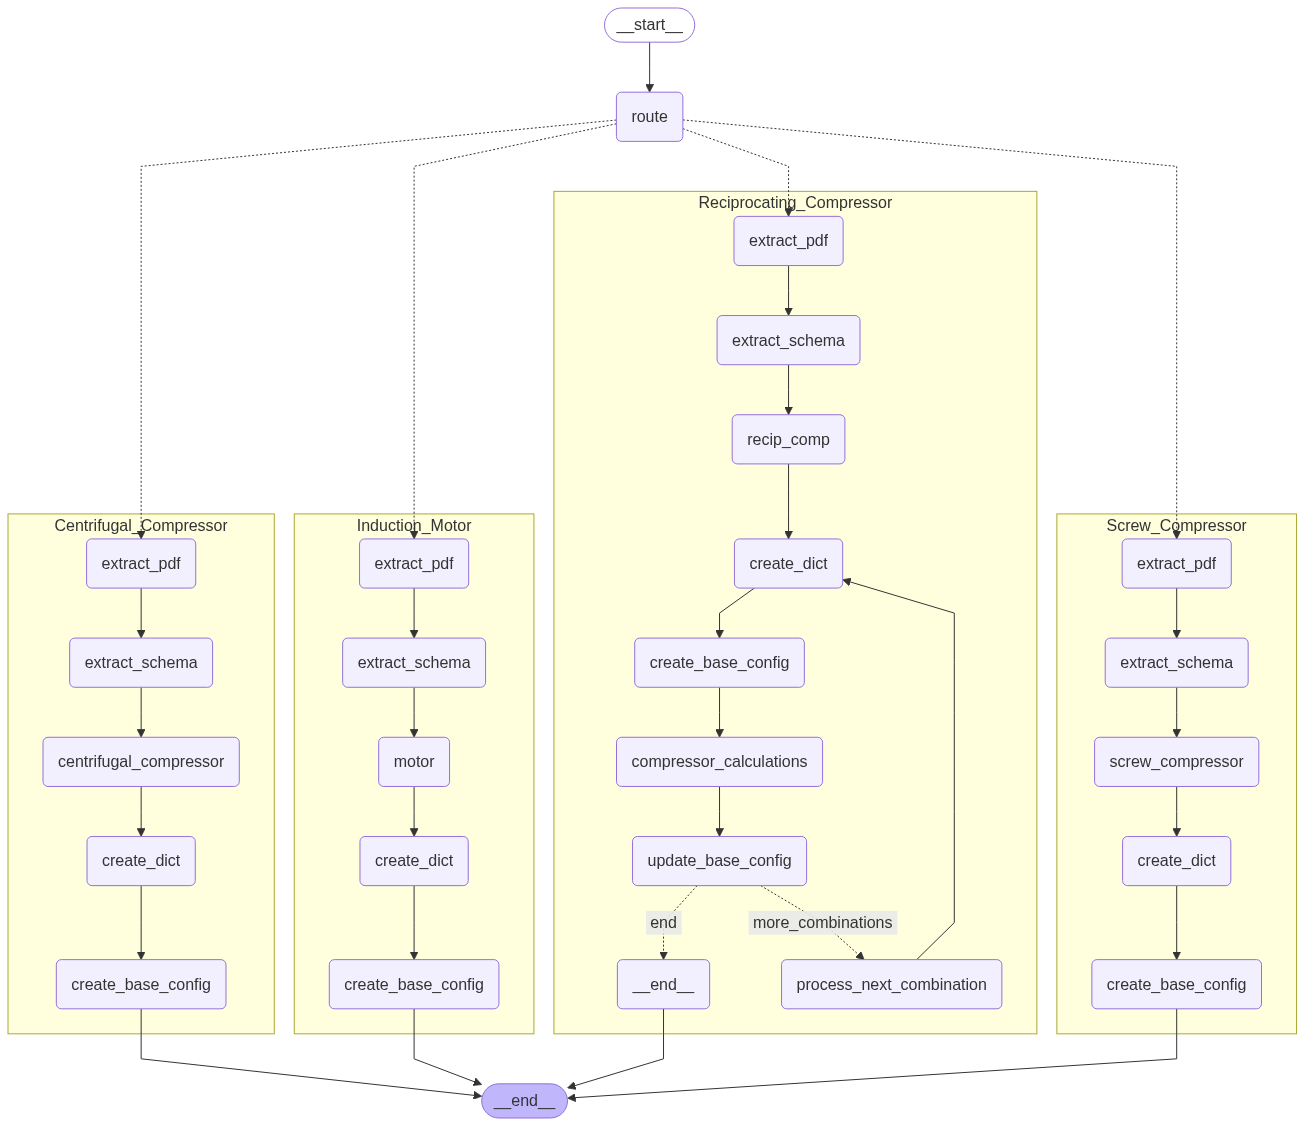

In [5]:
from IPython.display import Image

# Initialize EquipmentGraph with required arguments
final_graph = EquipmentGraph(input_data=input_data, llm=llm, logging=False)
png_data = final_graph.draw_graph()
display(Image(png_data))

In [6]:
from IPython.display import display, Image

display(Image(final_graph.get_graph(xray=2).draw_mermaid_png()))

AttributeError: 'EquipmentGraph' object has no attribute 'get_graph'

In [ ]:
import gradio as gr
from graph.graph import EquipmentGraph
from models.state import EquipmentState
from models.model import InputDataValidator

def process_equipment(pdf_path, schema_path, equipment_name):
    initial_state = EquipmentState()
    validator = InputDataValidator(pdf_path=pdf_path, schema_path=schema_path, equipment_name=equipment_name)
    graph = EquipmentGraph(initial_state, validator, llm=None, logging=True)  # Replace 'None' with your LLM instance
    result = graph.invoke_graph(initial_state)
    return str(result.final_config) if result.final_config else "Processing failed"

interface = gr.Interface(
    fn=process_equipment,
    inputs=[
        gr.File(label="Upload PDF"),
        gr.File(label="Upload Schema (JSON)"),
        gr.Dropdown(["Reciprocating Compressor", "Induction Motor", "Screw Compressor", "Centrifugal Compressor"], label="Equipment Type")
    ],
    outputs="text",
    title="Equipment Configuration Generator",
    description="Upload a PDF and schema to generate equipment configuration."
)

interface.launch()

c:\Users\kulsr\Downloads\agentic_framework\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
